<a href="https://colab.research.google.com/github/joseph-karadakis/Project_4/blob/main/AAPL_XCG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Import the modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout
import tensorflow as tf


In [13]:
# Read the csv file and clean the data
stock_data = pd.read_csv('/content/data.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')
price_columns = ['Close/Last', 'Open', 'High', 'Low']
for column in price_columns:
    stock_data[column] = stock_data[column].str.replace('$', '').astype(float)
aapl_data = stock_data[stock_data['Company'] == 'AAPL']
aapl_data =aapl_data.sort_values(by="Date")
aapl_data.head()

<ipython-input-13-21d6467b3ff7>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  stock_data[column] = stock_data[column].str.replace('$', '').astype(float)


,Company,Date,Close/Last,Volume,Open,High,Low
2515,AAPL,2013-07-18,15.4199,218632537,15.4779,15.5311,15.3789
2514,AAPL,2013-07-19,15.1768,268548901,15.4679,15.4993,15.1554
2513,AAPL,2013-07-22,15.2254,207648981,15.3379,15.3482,15.1953
2512,AAPL,2013-07-23,14.9639,354477618,15.2143,15.2486,14.9539
2511,AAPL,2013-07-24,15.7325,591624923,15.6761,15.8782,15.5450


# New Section

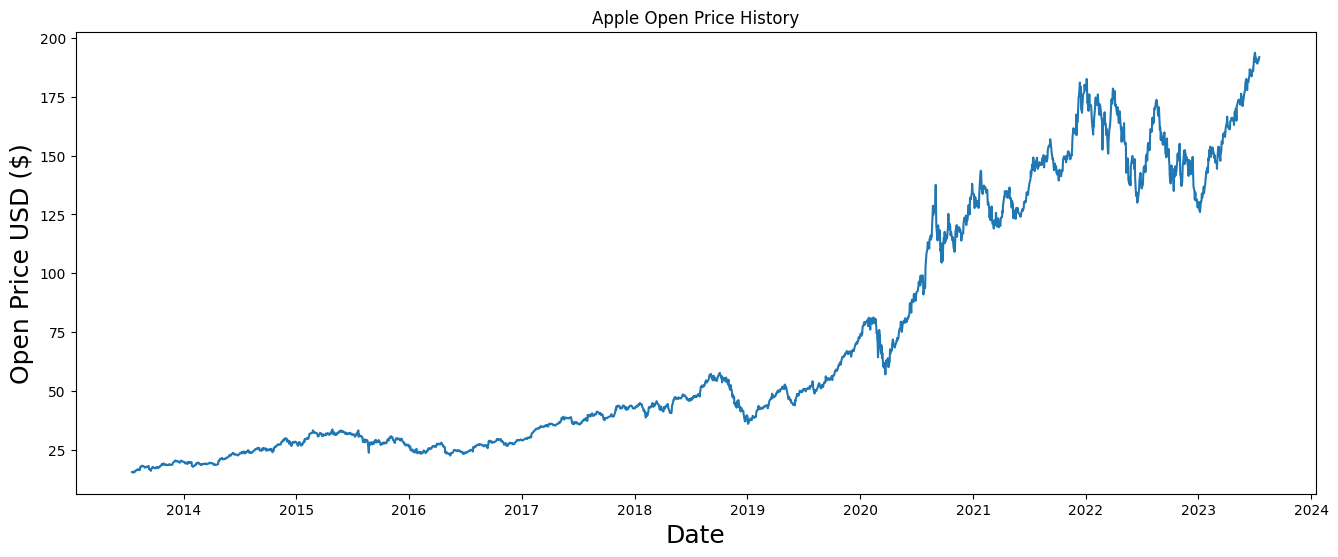

In [14]:

# Plotting the close price history
plt.figure(figsize=(16,6))
plt.title('Apple Open Price History')
plt.plot(aapl_data['Date'], aapl_data['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.show()

In [15]:
aapl_data.isna().any()

Company       False
Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

In [17]:
aapl_data.tail(10)

,Company,Date,Close/Last,Volume,Open,High,Low
9,AAPL,2023-07-03,192.46,31346600,193.780,193.8800,191.760
8,AAPL,2023-07-05,191.33,46920260,191.565,192.9800,190.620
7,AAPL,2023-07-06,191.81,45156010,189.840,192.0200,189.200
6,AAPL,2023-07-07,190.68,46815000,191.410,192.6700,190.240
5,AAPL,2023-07-10,188.61,59922160,189.260,189.9900,187.035
4,AAPL,2023-07-11,188.08,46638120,189.160,189.3000,186.600
3,AAPL,2023-07-12,189.77,60750250,189.680,191.7000,188.470
2,AAPL,2023-07-13,190.54,41342340,190.500,191.1900,189.780
1,AAPL,2023-07-14,190.69,41616240,190.230,191.1799,189.630
0,AAPL,2023-07-17,193.99,50520160,191.900,194.3200,191.810


In [18]:
aapl_data.describe()

,Close/Last,Volume,Open,High,Low
count,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000
mean,70.294163,1.494464e+08,70.232917,71.020345,69.495501
std,52.459923,9.674130e+07,52.395883,53.051779,51.795468
min,14.963900,3.134660e+07,15.214300,15.248600,14.953900
25%,28.381875,8.623933e+07,28.372500,28.620175,28.090625
50%,44.200000,1.197974e+08,44.072500,44.530000,43.757500
75%,124.771875,1.828922e+08,124.542500,125.882425,122.908125
max,193.990000,1.065209e+09,193.780000,194.480000,191.810000


In [19]:
aapl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 2515 to 0
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Company     2516 non-null   object        
 1   Date        2516 non-null   datetime64[ns]
 2   Close/Last  2516 non-null   float64       
 3   Volume      2516 non-null   int64         
 4   Open        2516 non-null   float64       
 5   High        2516 non-null   float64       
 6   Low         2516 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 157.2+ KB


In [20]:
aapl_data.isnull().sum()

Company       0
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [21]:
# Split training and testing datasets

df_test = aapl_data.tail(40)
aapl_df = aapl_data.iloc[::-1]

In [22]:
aapl_df['Open'].mean()

70.23291705087439

In [23]:
import seaborn as sb
features = ['Open', 'High', 'Low', 'Close/Last', 'Volume']

<ipython-input-24-c24a5a466345>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
<ipython-input-24-c24a5a466345>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(aapl_data[col])
<ipython-input-24-c24a5a466345>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use 

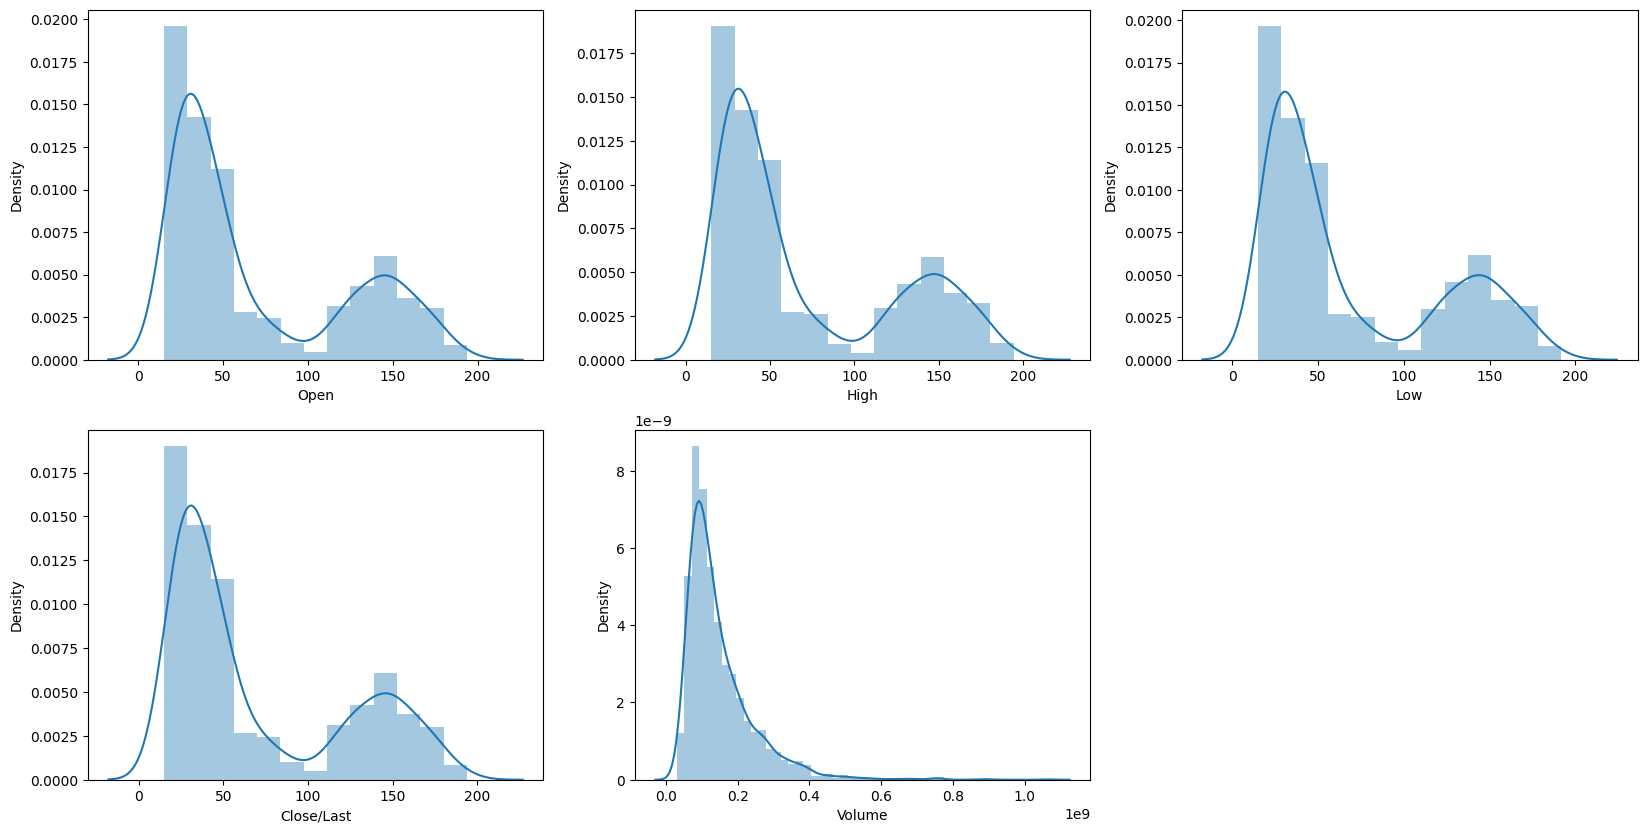

In [24]:
plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(aapl_data[col])
plt.show()

In [25]:
aapl_data.describe()

,Close/Last,Volume,Open,High,Low
count,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000
mean,70.294163,1.494464e+08,70.232917,71.020345,69.495501
std,52.459923,9.674130e+07,52.395883,53.051779,51.795468
min,14.963900,3.134660e+07,15.214300,15.248600,14.953900
25%,28.381875,8.623933e+07,28.372500,28.620175,28.090625
50%,44.200000,1.197974e+08,44.072500,44.530000,43.757500
75%,124.771875,1.828922e+08,124.542500,125.882425,122.908125
max,193.990000,1.065209e+09,193.780000,194.480000,191.810000


<ipython-input-27-e6eff0a4f4bc>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


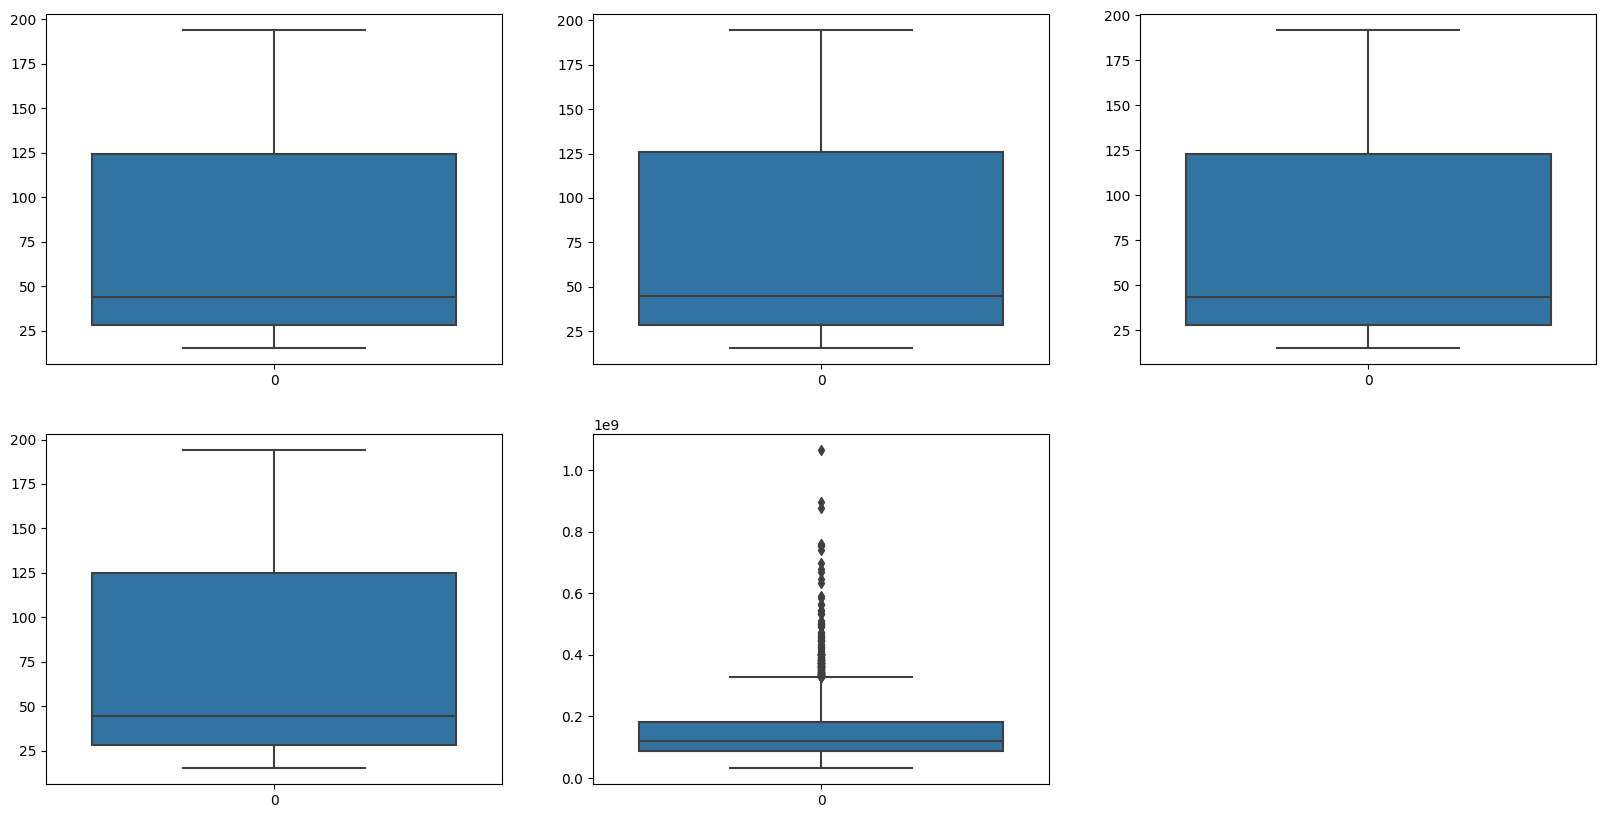

<ipython-input-27-e6eff0a4f4bc>:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = aapl_data.groupby('year').mean()
<ipython-input-27-e6eff0a4f4bc>:33: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


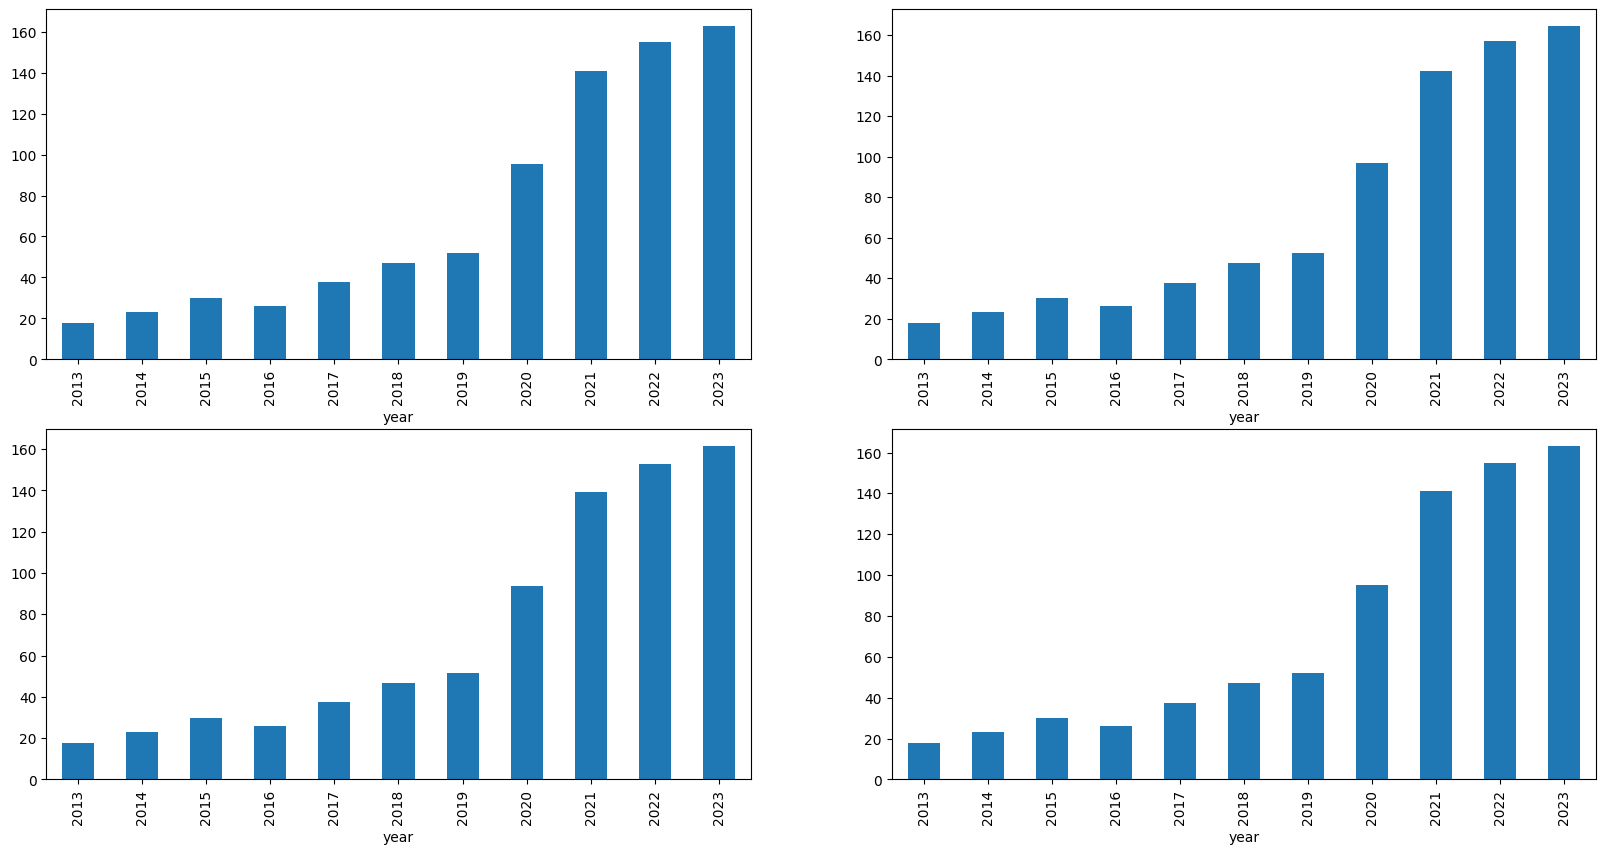

<ipython-input-27-e6eff0a4f4bc>:38: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aapl_data.groupby('is_quarter_end').mean()
<ipython-input-27-e6eff0a4f4bc>:51: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(aapl_data.corr() > 0.9, annot=True, cbar=False)


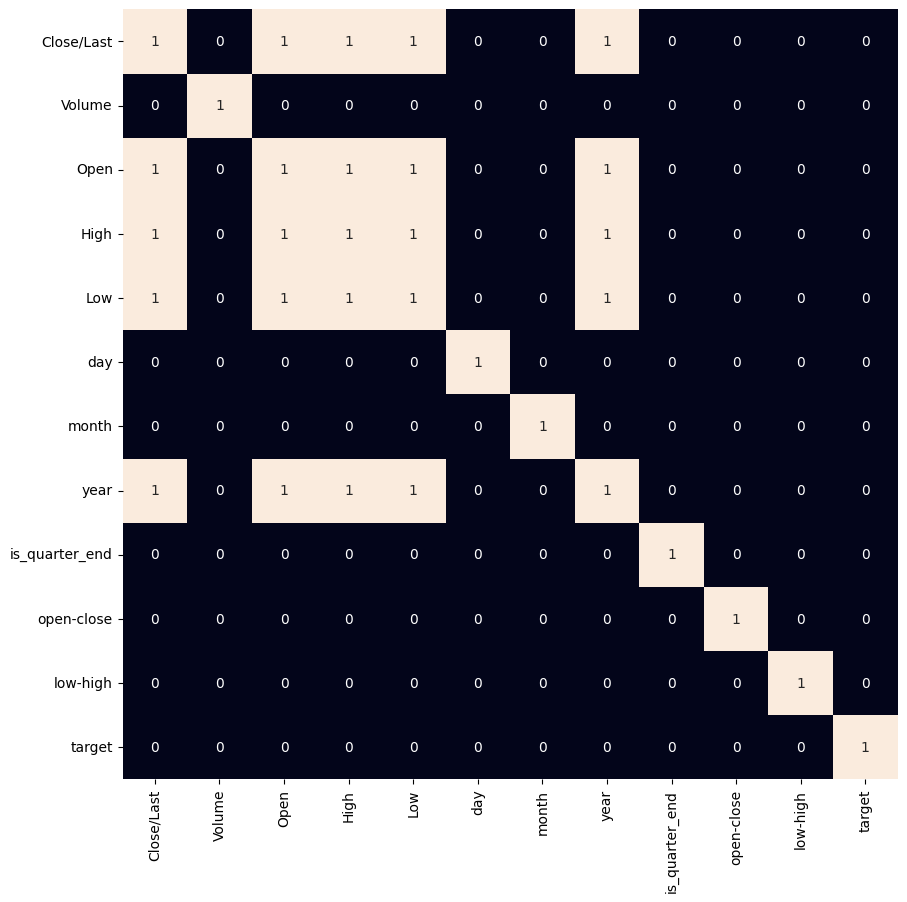

(2264, 3) (252, 3)
LogisticRegression() : 
Training Accuracy :  0.5321559725277262
Validation Accuracy :  0.5278904665314402

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.533309388603404
Validation Accuracy :  0.4947388438133874

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) 

In [27]:


# %%
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(aapl_data[col])
plt.show()

# %%
aapl_data["Date"] = aapl_data["Date"].astype(str)
splitted = aapl_data['Date'].str.split('-', expand=True)

aapl_data['day'] = splitted[2].astype('int')
aapl_data['month'] = splitted[1].astype('int')
aapl_data['year'] = splitted[0].astype('int')

aapl_data.head()

# %%
aapl_data.tail(5)

# %%
aapl_data.isnull().sum()

# %%
aapl_data['is_quarter_end'] = np.where(aapl_data['month']%3==0,1,0)
aapl_data.head()

# %%
data_grouped = aapl_data.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close/Last']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

# %%
aapl_data.groupby('is_quarter_end').mean()

# %%
aapl_data['open-close']  = aapl_data['Open'] - aapl_data['Close/Last']
aapl_data['low-high']  = aapl_data['Low'] - aapl_data['High']
aapl_data['target'] = np.where(aapl_data['Close/Last'].shift(-1) > aapl_data['Close/Last'], 1, 0)

# %%
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(aapl_data.corr() > 0.9, annot=True, cbar=False)
plt.show()

# %%
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
features = aapl_data[['open-close', 'low-high', 'is_quarter_end']]
target = aapl_data['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

# %%
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC

# %%
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()
